# Implementing BAND in python

In [1]:
%pylab inline
from pyband.example import samplefd

Populating the interactive namespace from numpy and matplotlib


This is a demonstration of a sample finite difference code using python.  The code solves two coupled equations: 
$$\frac{d^2c}{dx^2} - c T = 0; \mathrm{\ at\ }x=0: c=1, T = 1$$
$$\frac{d^2T}{dx^2} +c T = 0;\mathrm{\ at\ }x=1: c=0, \frac{dT}{dx}=0$$

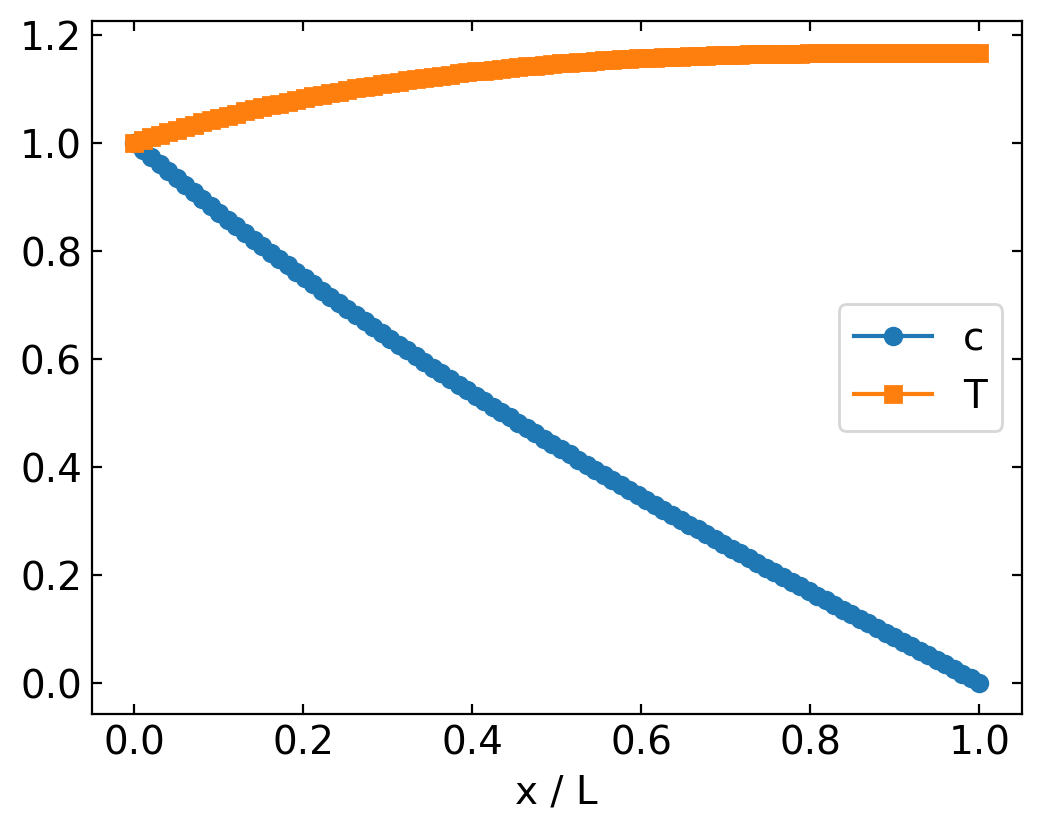

In [2]:
samplefd(DoPlot=True);

In [3]:
%timeit samplefd(DoPlot=False);

1000 loops, best of 3: 786 µs per loop


## Compare to solve_bvp

In [4]:
from scipy.integrate import solve_bvp

In [5]:
def samplefd(DoPlot=True):
    def deq(x,y):                       
        # y is defined as [c,vc,T,vT]  where vc=dc/dx and vT=dT/dx 

        c, vc, T, vT  =y

        return numpy.array([ vc,
                              c * T,
                              vT,
                             -c * T])    

    def bc(y0,y1):

        return (numpy.array([ y0[0] - 1,          # at x=0, c=1
                               y0[2] - 1  ,        # at x=0, T=1
                               y1[0] - 0,          #  at x=1, c=0
                               y1[3] - 0  ]) )     #  at x=1, dT/dx=0


    x=array([0,1])
    u = ones_like(x)
    du= zeros_like(x)
    uguess= array([u, du, u, du])

    sol=solve_bvp(deq,bc,x,uguess,tol=1e-6,verbose=0)

    x = linspace(0,1)
    y = sol.sol(x)

    c=y[0]
    T=y[2]

    if DoPlot:
        plot(x,c,'-o' )
        plot(x,T,'-s' )
        legend(['c','T'],loc='center right')
        xlabel('x / L');

    return x,c,T

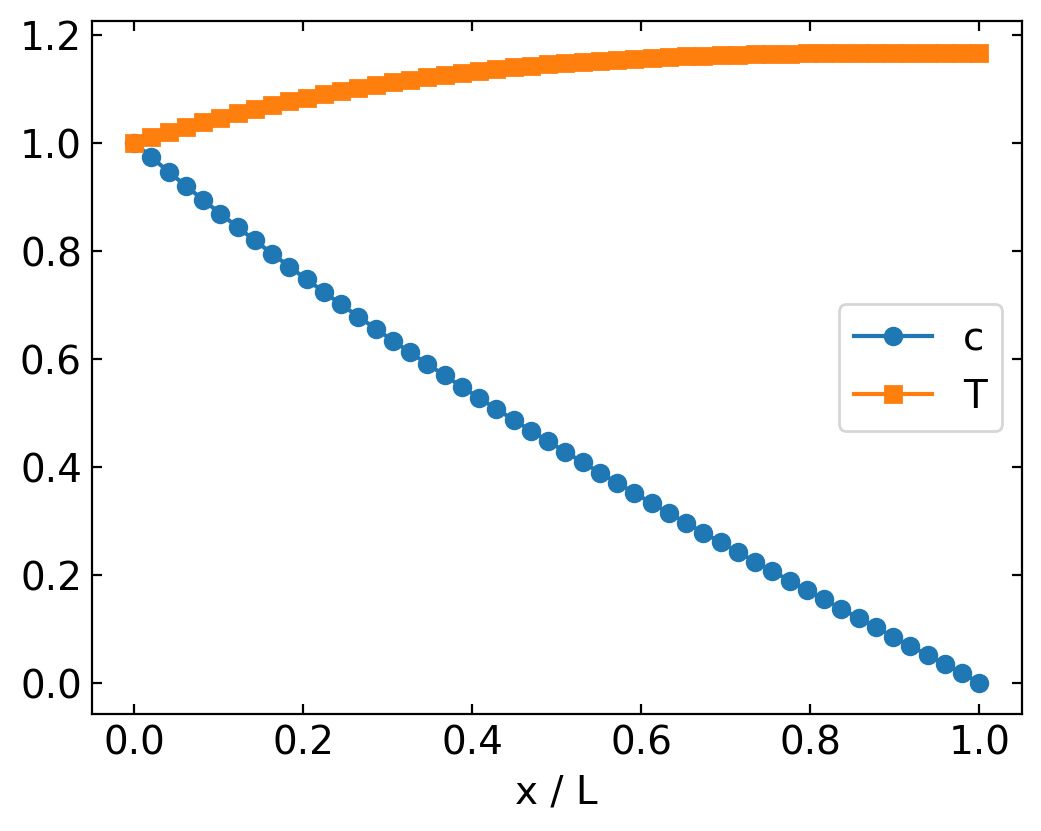

In [6]:
x,c,T=samplefd(DoPlot=True)

In [7]:
%timeit samplefd(DoPlot=False)

100 loops, best of 3: 7.97 ms per loop


So the BAND implementation accomplishes the same result, but **10x faster**